In [100]:
# !pip install skrebate
# !pip install scikit-multilearn

In [101]:
import itertools
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
from collections import Counter
# from google.colab import files
# 
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, f1_score, precision_score, recall_score, roc_curve, auc, roc_auc_score, plot_roc_curve, hamming_loss, plot_confusion_matrix
from sklearn.utils import resample
from sklearn.preprocessing import MinMaxScaler, StandardScaler, LabelEncoder, MultiLabelBinarizer
from sklearn.feature_selection import mutual_info_classif, chi2, SelectKBest, SelectFromModel, RFE
from sklearn.ensemble import BaggingClassifier, AdaBoostClassifier
from sklearn.multiclass import OneVsRestClassifier
# 
from skrebate import ReliefF
from skmultilearn.problem_transform import BinaryRelevance, ClassifierChain, LabelPowerset
# 
# 

In [102]:
def warn(*args, **kwargs):
    pass
import warnings
warnings.warn = warn

In [103]:
file_path = 'ccv/risk_factors_cervical_cancer.csv'
# file_path = 'https://archive.ics.uci.edu/ml/machine-learning-databases/00383/risk_factors_cervical_cancer.csv'
# 
# ['Hinselmann', 'Citology','Schiller','Biopsy']
# df = pd.read_csv(file_path) # Multiclass
# df = pd.read_csv(file_path).drop(['Biopsy','Schiller','Citology'], axis = 1) # Hinselmannn
# 
# df = pd.read_csv(file_path).drop(['Biopsy','Citology','Hinselmannn'], axis = 1) # Schiller
# 
# df = pd.read_csv(file_path).drop(['Biopsy','Schiller','Hinselmannn'], axis = 1) # Citology
# 
# df = pd.read_csv(file_path).drop(['Citology','Schiller','Hinselmann'], axis = 1) # Biopsy
df = pd.read_csv(file_path) # Biopsy
# 

In [104]:
df.describe()

,Age,STDs: Number of diagnosis,Dx:Cancer,Dx:CIN,Dx:HPV,Dx,Hinselmann,Schiller,Citology,Biopsy
count,858.000000,858.000000,858.000000,858.000000,858.000000,858.000000,858.000000,858.000000,858.000000,858.000000
mean,26.820513,0.087413,0.020979,0.010490,0.020979,0.027972,0.040793,0.086247,0.051282,0.064103
std,8.497948,0.302545,0.143398,0.101939,0.143398,0.164989,0.197925,0.280892,0.220701,0.245078
min,13.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,20.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,32.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,84.000000,3.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [105]:
df = df.replace('?', np.nan)
df.isna().sum()

Age                                     0
Number of sexual partners              26
First sexual intercourse                7
Num of pregnancies                     56
Smokes                                 13
Smokes (years)                         13
Smokes (packs/year)                    13
Hormonal Contraceptives               108
Hormonal Contraceptives (years)       108
IUD                                   117
IUD (years)                           117
STDs                                  105
STDs (number)                         105
STDs:condylomatosis                   105
STDs:cervical condylomatosis          105
STDs:vaginal condylomatosis           105
STDs:vulvo-perineal condylomatosis    105
STDs:syphilis                         105
STDs:pelvic inflammatory disease      105
STDs:genital herpes                   105
STDs:molluscum contagiosum            105
STDs:AIDS                             105
STDs:HIV                              105
STDs:Hepatitis B                  

In [106]:
df.dtypes

Age                                    int64
Number of sexual partners             object
First sexual intercourse              object
Num of pregnancies                    object
Smokes                                object
Smokes (years)                        object
Smokes (packs/year)                   object
Hormonal Contraceptives               object
Hormonal Contraceptives (years)       object
IUD                                   object
IUD (years)                           object
STDs                                  object
STDs (number)                         object
STDs:condylomatosis                   object
STDs:cervical condylomatosis          object
STDs:vaginal condylomatosis           object
STDs:vulvo-perineal condylomatosis    object
STDs:syphilis                         object
STDs:pelvic inflammatory disease      object
STDs:genital herpes                   object
STDs:molluscum contagiosum            object
STDs:AIDS                             object
STDs:HIV  

In [107]:
# Age                                   
# Number of sexual partners             
# First sexual intercourse              
# Num of pregnancies                    
# Smokes                                
# Smokes (years)                        
# Smokes (packs/year)                   
# Hormonal Contraceptives               
# Hormonal Contraceptives (years)       
# IUD                                   
# IUD (years)                           
# STDs                                  
# STDs (number)                         
# STDs:condylomatosis                   
# STDs:cervical condylomatosis          
# STDs:vaginal condylomatosis           
# STDs:vulvo-perineal condylomatosis    
# STDs:syphilis                         
# STDs:pelvic inflammatory disease      
# STDs:genital herpes                   
# STDs:molluscum contagiosum            
# STDs:AIDS                             
# STDs:HIV                              
# STDs:Hepatitis B                      
# STDs:HPV                              
# STDs: Number of diagnosis             
# STDs: Time since first diagnosis      
# STDs: Time since last diagnosis       
# Dx:Cancer                             
# Dx:CIN                                
# Dx:HPV                                
# Dx                                    
# Hinselmann                            
# Schiller                              
# Citology                              
# Biopsy                                 

In [108]:
df = df.astype('float64')
df.dtypes

Age                                   float64
Number of sexual partners             float64
First sexual intercourse              float64
Num of pregnancies                    float64
Smokes                                float64
Smokes (years)                        float64
Smokes (packs/year)                   float64
Hormonal Contraceptives               float64
Hormonal Contraceptives (years)       float64
IUD                                   float64
IUD (years)                           float64
STDs                                  float64
STDs (number)                         float64
STDs:condylomatosis                   float64
STDs:cervical condylomatosis          float64
STDs:vaginal condylomatosis           float64
STDs:vulvo-perineal condylomatosis    float64
STDs:syphilis                         float64
STDs:pelvic inflammatory disease      float64
STDs:genital herpes                   float64
STDs:molluscum contagiosum            float64
STDs:AIDS                         

In [109]:
# 
df['Number of sexual partners'] = df['Number of sexual partners'].fillna(df['Number of sexual partners'].median())
df['First sexual intercourse'] = df['First sexual intercourse'].fillna(df['First sexual intercourse'].median())
df['Num of pregnancies'] = df['Num of pregnancies'].fillna(df['Num of pregnancies'].median())
df['Smokes'] = df['Smokes'].fillna(df['Smokes'].median())
# df['Smokes (years)'] = df['Smokes (years)'].fillna(df['Smokes (years)'].median())
df['Smokes (years)'] = df['Smokes (years)'].fillna(1)
df['Smokes (packs/year)'] = df['Smokes (packs/year)'].fillna(df['Smokes (packs/year)'].median())
df['Hormonal Contraceptives (years)'] = df['Hormonal Contraceptives (years)'].fillna(df['Hormonal Contraceptives (years)'].median())
# df['IUD'] = df['IUD'].fillna(df['IUD'].median())
df['IUD'] = df['IUD'].fillna(0)
# df['IUD (years)'] = df['IUD (years)'].fillna(df['IUD (years)'].median())
df['IUD (years)'] = df['IUD (years)'].fillna(0)
# df['STDs'] = df['STDs'].fillna(df['STDs'].median())
df['STDs'] = df['STDs'].fillna(1)
df['STDs (number)'] = df['STDs (number)'].fillna(df['STDs (number)'].median())
df['STDs:condylomatosis'] = df['STDs:condylomatosis'].fillna(df['STDs:condylomatosis'].median())
df['STDs:cervical condylomatosis'] = df['STDs:cervical condylomatosis'].fillna(df['STDs:cervical condylomatosis'].median())
df['STDs:vaginal condylomatosis'] = df['STDs:vaginal condylomatosis'].fillna(df['STDs:vaginal condylomatosis'].median())
df['STDs:vulvo-perineal condylomatosis'] = df['STDs:vulvo-perineal condylomatosis'].fillna(df['STDs:vulvo-perineal condylomatosis'].median())
df['STDs:syphilis'] = df['STDs:syphilis'].fillna(df['STDs:syphilis'].median())
df['STDs:pelvic inflammatory disease'] = df['STDs:pelvic inflammatory disease'].fillna(df['STDs:pelvic inflammatory disease'].median())
df['STDs:genital herpes'] = df['STDs:genital herpes'].fillna(df['STDs:genital herpes'].median())
df['STDs:molluscum contagiosum'] = df['STDs:molluscum contagiosum'].fillna(df['STDs:molluscum contagiosum'].median())
df['STDs:AIDS'] = df['STDs:AIDS'].fillna(df['STDs:AIDS'].median())
df['STDs:HIV'] = df['STDs:HIV'].fillna(df['STDs:HIV'].median())
df['STDs:Hepatitis B'] = df['STDs:Hepatitis B'].fillna(df['STDs:Hepatitis B'].median())
df['STDs:HPV'] = df['STDs:HPV'].fillna(df['STDs:HPV'].median())
df['STDs: Time since first diagnosis'] = df['STDs: Time since first diagnosis'].fillna(df['STDs: Time since first diagnosis'].median())
df['STDs: Time since last diagnosis'] = df['STDs: Time since last diagnosis'].fillna(df['STDs: Time since last diagnosis'].median())



In [110]:
df.columns.size

36

In [111]:
# Imputing values for categorical variables

df = pd.get_dummies(data = df, columns = ['Smokes','Hormonal Contraceptives','IUD','STDs',
                                      'Dx:Cancer','Dx:CIN','Dx:HPV','Dx','Hinselmann','Citology','Schiller'])

# 
df.isna().sum(), df.columns.size

(Age                                   0
 Number of sexual partners             0
 First sexual intercourse              0
 Num of pregnancies                    0
 Smokes (years)                        0
 Smokes (packs/year)                   0
 Hormonal Contraceptives (years)       0
 IUD (years)                           0
 STDs (number)                         0
 STDs:condylomatosis                   0
 STDs:cervical condylomatosis          0
 STDs:vaginal condylomatosis           0
 STDs:vulvo-perineal condylomatosis    0
 STDs:syphilis                         0
 STDs:pelvic inflammatory disease      0
 STDs:genital herpes                   0
 STDs:molluscum contagiosum            0
 STDs:AIDS                             0
 STDs:HIV                              0
 STDs:Hepatitis B                      0
 STDs:HPV                              0
 STDs: Number of diagnosis             0
 STDs: Time since first diagnosis      0
 STDs: Time since last diagnosis       0
 Biopsy         

In [112]:
# df_target = df.loc[(df['Hinselmann'] == 1.0) | (df['Citology'] == 1.0) | (df['Schiller'] == 1.0) | (df['Biopsy'] == 1.0)]
# df_not_target = df.loc[(df['Hinselmann'] != 1.0) & (df['Citology'] != 1.0) & (df['Schiller'] != 1.0) & (df['Biopsy'] != 1.0)]

# df_target = df.loc[(df['Hinselmann'] == 1.0)]
# df_not_target = df.loc[(df['Hinselmann'] != 1.0)]

# df_target = df.loc[(df['Hinselmann'] != 1.0)]
# df_not_target = df.loc[(df['Hinselmann'] == 1.0)]


In [113]:
# target_upsampled = resample(df_target,
#                           replace=True, # sample with replacement
#                           n_samples=len(df_not_target), # match number in majority class
#                           random_state=0)
# df_new =  pd.concat([df_not_target, target_upsampled])


In [114]:
# df = df.drop(['Hormonal Contraceptives', 'STDs: Time since first diagnosis', 'STDs: Time since last diagnosis'], axis=1)
# 

In [115]:
df.columns

Index(['Age', 'Number of sexual partners', 'First sexual intercourse',
       'Num of pregnancies', 'Smokes (years)', 'Smokes (packs/year)',
       'Hormonal Contraceptives (years)', 'IUD (years)', 'STDs (number)',
       'STDs:condylomatosis', 'STDs:cervical condylomatosis',
       'STDs:vaginal condylomatosis', 'STDs:vulvo-perineal condylomatosis',
       'STDs:syphilis', 'STDs:pelvic inflammatory disease',
       'STDs:genital herpes', 'STDs:molluscum contagiosum', 'STDs:AIDS',
       'STDs:HIV', 'STDs:Hepatitis B', 'STDs:HPV', 'STDs: Number of diagnosis',
       'STDs: Time since first diagnosis', 'STDs: Time since last diagnosis',
       'Biopsy', 'Smokes_0.0', 'Smokes_1.0', 'Hormonal Contraceptives_0.0',
       'Hormonal Contraceptives_1.0', 'IUD_0.0', 'IUD_1.0', 'STDs_0.0',
       'STDs_1.0', 'Dx:Cancer_0.0', 'Dx:Cancer_1.0', 'Dx:CIN_0.0',
       'Dx:CIN_1.0', 'Dx:HPV_0.0', 'Dx:HPV_1.0', 'Dx_0.0', 'Dx_1.0',
       'Hinselmann_0.0', 'Hinselmann_1.0', 'Citology_0.0', 'Citology_1.0

In [116]:
cols_at_end = ['Biopsy']
df = df[[c for c in df if c not in cols_at_end] 
        + [c for c in cols_at_end if c in df]]
      

In [117]:
  df.columns

Index(['Age', 'Number of sexual partners', 'First sexual intercourse',
       'Num of pregnancies', 'Smokes (years)', 'Smokes (packs/year)',
       'Hormonal Contraceptives (years)', 'IUD (years)', 'STDs (number)',
       'STDs:condylomatosis', 'STDs:cervical condylomatosis',
       'STDs:vaginal condylomatosis', 'STDs:vulvo-perineal condylomatosis',
       'STDs:syphilis', 'STDs:pelvic inflammatory disease',
       'STDs:genital herpes', 'STDs:molluscum contagiosum', 'STDs:AIDS',
       'STDs:HIV', 'STDs:Hepatitis B', 'STDs:HPV', 'STDs: Number of diagnosis',
       'STDs: Time since first diagnosis', 'STDs: Time since last diagnosis',
       'Smokes_0.0', 'Smokes_1.0', 'Hormonal Contraceptives_0.0',
       'Hormonal Contraceptives_1.0', 'IUD_0.0', 'IUD_1.0', 'STDs_0.0',
       'STDs_1.0', 'Dx:Cancer_0.0', 'Dx:Cancer_1.0', 'Dx:CIN_0.0',
       'Dx:CIN_1.0', 'Dx:HPV_0.0', 'Dx:HPV_1.0', 'Dx_0.0', 'Dx_1.0',
       'Hinselmann_0.0', 'Hinselmann_1.0', 'Citology_0.0', 'Citology_1.0',
       

In [118]:
# df.loc[24]
# df.loc[['Hinselmann']]
# df.columns.get_loc('Hinselmann')

## Preprocess

In [119]:
# 
# Feature scaling
class PreprocessDataFrame():
    def __init__(self, dataframe, test_size=0.25, features_size=1, target_size=1):
        """
          Preprocess the dataset. 
        """
        # self.dataframe = self.cleanNullValues(dataframe)
        self.dataframe = dataframe
        self.test_size = test_size
        self.feature_vector =  self.dataframe.iloc[:, :features_size].values
        self.target_vector = self.dataframe.iloc[:, target_size:].values
        # self.target_vector = self.dataframe.iloc[:, :target_size].values

    # clean null values
    def cleanNullValues(self, dataframe):
        # determining the null values in each column
        dataframe = dataframe.replace("?", np.nan)
        for column in dataframe.columns:
          dataframe[column] = dataframe[column].fillna(dataframe[column].median())
        
        return dataframe
    
    #
    def standardScaler(self):
        # Get the feature vector
        X = self.feature_vector

        # Get the target vector
        y = self.target_vector

        # Encoding categorical data values
        # labelencoder_Y = LabelEncoder()
        # y = labelencoder_Y.fit_transform(y)

        #
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=self.test_size)

        # Declare the standard scaler
        std_scaler = StandardScaler()

        std_scaler.fit(X_train)

        # Standardize the training set
        # X_train = std_scaler.fit_transform(X_train)
        X_train = std_scaler.transform(X_train)

        # Standardize the testing set
        # X_train = std_scaler.fit_transform(X_train)
        X_test = std_scaler.transform(X_test)

        #
        return X_train, X_test, y_train, y_test

    #
    def minMaxScaler(self):
        # Get the feature vector
        X = self.feature_vector

        # Get the target vector
        y = self.target_vector

        # splitting the dataset into  training and test set
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=self.test_size)

        # MinMaxScaling
        mm = MinMaxScaler(feature_range=(0, 1))

        # feeding the independent data into the scaler
      
        # Standardize the training set
        X_train = mm.fit_transform(X_train)
        # X_train = mm.transform(X_train)

        # Standardize the testing set
        X_test = mm.fit_transform(X_test)
        # X_test = mm.transform(X_test)

        #
        return X_train, X_test, y_train, y_test


In [120]:
# df.iloc[:, df.columns.size-4:]
# target = ['Hinselmann', 'Citology','Schiller','Biopsy']
# 
# X_train, X_test, y_train, y_test = PreprocessDataFrame(dataframe=df, test_size=0.10, target_size=df.columns.size-1, features_size=df.columns.size-1).standardScaler()
X_train, X_test, y_train, y_test = PreprocessDataFrame(dataframe=df, test_size=0.40, target_size=df.columns.size-1, features_size=df.columns.size-1).minMaxScaler()
# 
print(X_train.shape)
print(X_test.shape) 
print(y_train.shape)
print(y_test.shape)


(514, 46)
(344, 46)
(514, 1)
(344, 1)


In [121]:
# def build_multiclass_model(model,mlb_estimator,xtrain,ytrain,xtest,ytest):
#     clf = mlb_estimator(model).fit(xtrain,ytrain)
#     clf_predictions = clf.predict(xtest)
#     acc = accuracy_score(ytest,clf_predictions.toarray())
#     ham = hamming_loss(ytest,clf_predictions.toarray())
#     result = {"accuracy:":acc,"hamming_score":ham}
#     return result
# 
# 
# clf_labelPower_model = build_multiclass_model(SVC(),LabelPowerset,X_train,y_train,X_test,y_test)
# clf_labelPower_model
# 
# 

In [122]:
def get_df_cols(df_cols: list, cols_to_select: list):
    # 
    # create a dictionary of columns and it repective index value
    df_cols_dict = {}
    for col in df_cols:
        df_cols_dict[col] = df_cols.index(col)
    # 
    soln = []
    for col in cols_to_select:
        soln.append(df_cols_dict[col])
    # 
    return soln


## Filters

#### Chi Squared Score

In [123]:
# change this to how much features you want to keep from the top ones.
CS_select_k = 40

def chi_square(_X_train, _y_train):
  # apply the chi2 score on the data and target (target should be binary).  
  CS_selection = SelectKBest(chi2, k=CS_select_k).fit(_X_train, _y_train)

  # return the k selected features.
  CS_features = df.iloc[:, :df.columns.size-1].columns[CS_selection.get_support()]
  return CS_features

In [124]:

# display the k selected features.
CS_retained_features = chi_square(X_train, y_train)
CS_retained_features, len(CS_retained_features), get_df_cols(list(df.columns), CS_retained_features)


(Index(['Age', 'Num of pregnancies', 'Smokes (years)', 'Smokes (packs/year)',
        'Hormonal Contraceptives (years)', 'IUD (years)', 'STDs (number)',
        'STDs:condylomatosis', 'STDs:vaginal condylomatosis',
        'STDs:vulvo-perineal condylomatosis', 'STDs:syphilis',
        'STDs:pelvic inflammatory disease', 'STDs:genital herpes', 'STDs:HIV',
        'STDs:HPV', 'STDs: Number of diagnosis',
        'STDs: Time since first diagnosis', 'STDs: Time since last diagnosis',
        'Smokes_0.0', 'Smokes_1.0', 'Hormonal Contraceptives_0.0',
        'Hormonal Contraceptives_1.0', 'IUD_0.0', 'IUD_1.0', 'STDs_0.0',
        'STDs_1.0', 'Dx:Cancer_0.0', 'Dx:Cancer_1.0', 'Dx:CIN_0.0',
        'Dx:CIN_1.0', 'Dx:HPV_0.0', 'Dx:HPV_1.0', 'Dx_0.0', 'Dx_1.0',
        'Hinselmann_0.0', 'Hinselmann_1.0', 'Citology_0.0', 'Citology_1.0',
        'Schiller_0.0', 'Schiller_1.0'],
       dtype='object'),
 40,
 [0,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  11,
  12,
  13,
  14,
  15,
  18,
  20,
  21,
  2

#### Mutual Information/Information Gain

In [125]:
# select the number of features you want to retain.
MI_select_k = 40

def mutual_info(_X_train, _y_train):
  # 
  # create the SelectKBest with the mutual info strategy.
  MI_selection_dna = SelectKBest(mutual_info_classif, k=MI_select_k).fit(_X_train, _y_train)

  # return the retained features.
  MI_features_dna = df.iloc[:, :df.columns.size-1].columns[MI_selection_dna.get_support()]
  return MI_features_dna


In [126]:
MI_retained_features = mutual_info(X_train, y_train)
MI_retained_features, len(MI_retained_features),  get_df_cols(list(df.columns), MI_retained_features)


(Index(['Age', 'Number of sexual partners', 'First sexual intercourse',
        'Num of pregnancies', 'Hormonal Contraceptives (years)',
        'STDs:cervical condylomatosis', 'STDs:vulvo-perineal condylomatosis',
        'STDs:syphilis', 'STDs:pelvic inflammatory disease',
        'STDs:genital herpes', 'STDs:molluscum contagiosum', 'STDs:AIDS',
        'STDs:HIV', 'STDs:Hepatitis B', 'STDs:HPV', 'STDs: Number of diagnosis',
        'STDs: Time since first diagnosis', 'STDs: Time since last diagnosis',
        'Smokes_0.0', 'Smokes_1.0', 'Hormonal Contraceptives_0.0',
        'Hormonal Contraceptives_1.0', 'IUD_0.0', 'IUD_1.0', 'STDs_0.0',
        'STDs_1.0', 'Dx:Cancer_0.0', 'Dx:Cancer_1.0', 'Dx:CIN_0.0',
        'Dx:CIN_1.0', 'Dx:HPV_0.0', 'Dx:HPV_1.0', 'Dx_0.0', 'Dx_1.0',
        'Hinselmann_0.0', 'Hinselmann_1.0', 'Citology_0.0', 'Citology_1.0',
        'Schiller_0.0', 'Schiller_1.0'],
       dtype='object'),
 40,
 [0,
  1,
  2,
  3,
  6,
  10,
  12,
  13,
  14,
  15,
  16,
  17,

#### ReliefF

In [127]:
# select the number of features you want to retain.
RF_select_k = 40


def reliefF(_X_train, _y_train, n_neighbors=100):
  # 
  # create the SelectKBest with the mutual info strategy.
  RF_selection_dna = SelectFromModel(estimator= ReliefF(n_features_to_select=RF_select_k, n_neighbors=n_neighbors), max_features=RF_select_k, threshold=-np.inf).fit(_X_train, _y_train.flatten())

  # return the retained features.
  RF_features_dna = df.iloc[:, :df.columns.size-1].columns[RF_selection_dna.get_support()]
  return RF_features_dna

In [128]:
RF_retained_features = reliefF(X_train, y_train)
RF_retained_features, len(RF_retained_features),  get_df_cols(list(df.columns), RF_retained_features)


(Index(['Age', 'Number of sexual partners', 'First sexual intercourse',
        'Num of pregnancies', 'Smokes (years)', 'Smokes (packs/year)',
        'Hormonal Contraceptives (years)', 'IUD (years)', 'STDs (number)',
        'STDs:condylomatosis', 'STDs:cervical condylomatosis',
        'STDs:vulvo-perineal condylomatosis', 'STDs:genital herpes',
        'STDs:molluscum contagiosum', 'STDs:HIV', 'STDs: Number of diagnosis',
        'STDs: Time since first diagnosis', 'STDs: Time since last diagnosis',
        'Smokes_0.0', 'Smokes_1.0', 'Hormonal Contraceptives_0.0',
        'Hormonal Contraceptives_1.0', 'IUD_0.0', 'IUD_1.0', 'STDs_0.0',
        'STDs_1.0', 'Dx:Cancer_0.0', 'Dx:Cancer_1.0', 'Dx:CIN_0.0',
        'Dx:CIN_1.0', 'Dx:HPV_0.0', 'Dx:HPV_1.0', 'Dx_0.0', 'Dx_1.0',
        'Hinselmann_0.0', 'Hinselmann_1.0', 'Citology_0.0', 'Citology_1.0',
        'Schiller_0.0', 'Schiller_1.0'],
       dtype='object'),
 40,
 [0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  12,
  15,


In [129]:
# 
def features_simple_voting(columns_list: list, available_min: int = 2, total_feature_len: int = 5) -> list:
    """
        A simple voting technique used to combine features \n
        from different feature selection algorithms that were chosen by them.
    """
    new_features_list = []
    flat_list = []
    for column_list in columns_list:
        flat_list += list(column_list) 
    # 
    new_dict = dict(Counter(flat_list))
    # 
    for k in new_dict:
        if(new_dict[k] >= available_min):
            new_features_list.append(k)
            # 

    return new_features_list
# 

In [130]:
sv_features = features_simple_voting([CS_retained_features, MI_retained_features, RF_retained_features], total_feature_len = 20)
sv_features, len(sv_features)
# 

(['Age',
  'Num of pregnancies',
  'Smokes (years)',
  'Smokes (packs/year)',
  'Hormonal Contraceptives (years)',
  'IUD (years)',
  'STDs (number)',
  'STDs:condylomatosis',
  'STDs:vulvo-perineal condylomatosis',
  'STDs:syphilis',
  'STDs:pelvic inflammatory disease',
  'STDs:genital herpes',
  'STDs:HIV',
  'STDs:HPV',
  'STDs: Number of diagnosis',
  'STDs: Time since first diagnosis',
  'STDs: Time since last diagnosis',
  'Smokes_0.0',
  'Smokes_1.0',
  'Hormonal Contraceptives_0.0',
  'Hormonal Contraceptives_1.0',
  'IUD_0.0',
  'IUD_1.0',
  'STDs_0.0',
  'STDs_1.0',
  'Dx:Cancer_0.0',
  'Dx:Cancer_1.0',
  'Dx:CIN_0.0',
  'Dx:CIN_1.0',
  'Dx:HPV_0.0',
  'Dx:HPV_1.0',
  'Dx_0.0',
  'Dx_1.0',
  'Hinselmann_0.0',
  'Hinselmann_1.0',
  'Citology_0.0',
  'Citology_1.0',
  'Schiller_0.0',
  'Schiller_1.0',
  'Number of sexual partners',
  'First sexual intercourse',
  'STDs:cervical condylomatosis',
  'STDs:molluscum contagiosum'],
 43)

#### RFE Method

In [131]:
# select the number of features you want to retain.
RFE_select_k = 35

def RFE_SVC(_X_train, _y_train, _features:list):
  # 
  df_copy = df[_features]
  # create the SelectKBest with the mutual info strategy.
  RFE_selection_dna = RFE(estimator=SVC(kernel="linear"), n_features_to_select=RFE_select_k, step=3).fit(_X_train, _y_train.flatten())

  # return the retained features.
  RFE_features_dna = df.iloc[:, :df.columns.size-1].columns[RFE_selection_dna.support_]
  return list(RFE_features_dna)
# 

In [132]:
final_features = RFE_SVC(X_train, y_train, sv_features)
final_features, len(final_features)
# 

(['Age',
  'Number of sexual partners',
  'First sexual intercourse',
  'Num of pregnancies',
  'Smokes (years)',
  'Smokes (packs/year)',
  'Hormonal Contraceptives (years)',
  'IUD (years)',
  'STDs (number)',
  'STDs:condylomatosis',
  'STDs:vulvo-perineal condylomatosis',
  'STDs:syphilis',
  'STDs:genital herpes',
  'STDs:HIV',
  'STDs: Number of diagnosis',
  'STDs: Time since last diagnosis',
  'Smokes_0.0',
  'Smokes_1.0',
  'Hormonal Contraceptives_0.0',
  'Hormonal Contraceptives_1.0',
  'IUD_0.0',
  'IUD_1.0',
  'STDs_1.0',
  'Dx:Cancer_0.0',
  'Dx:Cancer_1.0',
  'Dx:CIN_0.0',
  'Dx:CIN_1.0',
  'Dx:HPV_0.0',
  'Dx:HPV_1.0',
  'Hinselmann_0.0',
  'Hinselmann_1.0',
  'Citology_0.0',
  'Citology_1.0',
  'Schiller_0.0',
  'Schiller_1.0'],
 35)

## Classifiers

In [133]:
performance_data_agg = [] # list to store all performance metric
# 
df_fin = df[final_features + [df.columns[df.columns.size-1]]] # new_df = chosen_features + target_variable


In [134]:
df_fin.describe()


,Age,Number of sexual partners,First sexual intercourse,Num of pregnancies,Smokes (years),Smokes (packs/year),Hormonal Contraceptives (years),IUD (years),STDs (number),STDs:condylomatosis,...,Dx:CIN_1.0,Dx:HPV_0.0,Dx:HPV_1.0,Hinselmann_0.0,Hinselmann_1.0,Citology_0.0,Citology_1.0,Schiller_0.0,Schiller_1.0,Biopsy
count,858.000000,858.000000,858.000000,858.000000,858.000000,858.000000,858.000000,858.000000,858.000000,858.000000,...,858.000000,858.000000,858.000000,858.000000,858.000000,858.000000,858.000000,858.000000,858.000000,858.000000
mean,26.820513,2.511655,16.995338,2.257576,1.216392,0.446278,2.035331,0.444604,0.155012,0.051282,...,0.010490,0.979021,0.020979,0.959207,0.040793,0.948718,0.051282,0.913753,0.086247,0.064103
std,8.497948,1.644759,2.791883,1.400981,4.057974,2.210351,3.567040,1.814218,0.529617,0.220701,...,0.101939,0.143398,0.143398,0.197925,0.197925,0.220701,0.220701,0.280892,0.280892,0.245078
min,13.000000,1.000000,10.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,20.000000,2.000000,15.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000
50%,25.000000,2.000000,17.000000,2.000000,0.000000,0.000000,0.500000,0.000000,0.000000,0.000000,...,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000
75%,32.000000,3.000000,18.000000,3.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,...,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000
max,84.000000,28.000000,32.000000,11.000000,37.000000,37.000000,30.000000,19.000000,4.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [135]:

# df_fin.iloc[:, df_fin.columns.size-4:]
# target = ['Hinselmann', 'Citology','Schiller','Biopsy']
# 
# X_train_fin, X_test_fin, y_train_fin, y_test_fin = PreprocessDataFrame(dataframe=df_fin, target_size=df_fin.columns.size-1, features_size=df_fin.columns.size-1).standardScaler()
X_train_fin, X_test_fin, y_train_fin, y_test_fin = PreprocessDataFrame(dataframe=df_fin, test_size=0.40, target_size=df_fin.columns.size-1, features_size=df_fin.columns.size-1).minMaxScaler()
# 
print(X_train_fin.shape)
print(X_test_fin.shape) 
print(y_train_fin.shape)
print(y_test_fin.shape)


(514, 35)
(344, 35)
(514, 1)
(344, 1)


### SVM

In [136]:
# 
# default parameters
# 
kfolds=10 # set the number of folds
# kfold_run_time = int(kfolds/(kfolds-(kfolds/2)))
# 
default_params = {
    'C': [2e-2, 2e-1, 1e-4, 1e-3, 1e-2, 1e-1, 1, 1e1, 1e2, 1e3, 2e1],
    'gamma': ['scale','auto'],
    'tol': [1e-3]
}
# 
# 

#### Linear SVM

In [137]:
linear_svc_params = {}
# 
for k in default_params:
    linear_svc_params[k] = default_params[k]
# 
# perform grid-search and cross-validation
SelectedLinearSVC = GridSearchCV(SVC(kernel='linear'), linear_svc_params, cv=kfolds, scoring='accuracy').fit(X_train_fin, y_train_fin)
# 

In [138]:
#
# best_estimator = SelectedLinearSVC.best_estimator_
# 
best_score = SelectedLinearSVC.best_score_
# 
best_parameters = SelectedLinearSVC.best_params_
# 
# best_model_settings = SelectedLinearSVC.cv_results_['params'][SelectedLinearSVC.best_index_]
# 
PredictedOutputLinearSVC = SelectedLinearSVC.predict(X_test_fin)
# 
test_acc = SelectedLinearSVC.score(X_test_fin, y_test_fin)
# test_acc = accuracy_score(y_test_fin, PredictedOutputLinearSVC)
# 
fpr, tpr, thresholds = roc_curve(y_test_fin, PredictedOutputLinearSVC, pos_label=1)
# roc_auc_score
# 
test_auc = auc(fpr, tpr)
# 
mislabeled_points = (y_test_fin.flatten() != PredictedOutputLinearSVC.flatten()).sum()
# 
# test_recall = recall_score(y_test_fin, PredictedOutputLinearSVC, pos_label=1)
test_recall = {
    'Micro':recall_score(y_test_fin, PredictedOutputLinearSVC, average='micro'), 
    'Macro':recall_score(y_test_fin, PredictedOutputLinearSVC, average='macro'), 
    'Weighted':recall_score(y_test_fin, PredictedOutputLinearSVC, average='weighted')
    }
# 
test_precision = {
    'Micro':precision_score(y_test_fin, PredictedOutputLinearSVC, average='micro'), 
    'Macro':precision_score(y_test_fin, PredictedOutputLinearSVC, average='macro'), 
    'Weighted':precision_score(y_test_fin, PredictedOutputLinearSVC, average='weighted')
    }
# 
test_f1_score = {
    'Micro':f1_score(y_test_fin, PredictedOutputLinearSVC, average='micro'), 
    'Macro':f1_score(y_test_fin, PredictedOutputLinearSVC, average='macro'), 
    'Weighted':f1_score(y_test_fin, PredictedOutputLinearSVC, average='weighted')
    }
#
print("Best accuracy on validation set is:", best_score)
print("Best parameters are: ", best_parameters)
print("Test Accuracy with best C parameter is", test_acc)   
print("Test F1-Score with best C parameter is", test_f1_score)   
print("Test Precision with best C parameter is", test_precision)   
print("Test recall with the best C parameter is", test_recall)
# print("Test AUC with the best C parameter is", test_auc)
# print("Test ROC CURVE with the best C parameter is", [fpr, tpr])
print("Number of mislabeled points out of a total of %d points : %d" % (X_test_fin.shape[0], mislabeled_points))
# 
m = 'Linear(SVM)'
performance_data_agg.append([m, test_acc, test_f1_score['Micro'], test_precision['Micro'], test_recall['Micro'], test_auc, fpr, tpr, thresholds, mislabeled_points])
# 

Best accuracy on validation set is: 0.9573529411764706
Best parameters are:  {'C': 10.0, 'gamma': 'scale', 'tol': 0.001}
Test Accuracy with best C parameter is 0.9534883720930233
Test F1-Score with best C parameter is {'Micro': 0.9534883720930233, 'Macro': 0.8057594579333711, 'Weighted': 0.9525035126652922}
Test Precision with best C parameter is {'Micro': 0.9534883720930233, 'Macro': 0.8194014447884417, 'Weighted': 0.9517123863009095}
Test recall with the best C parameter is {'Micro': 0.9534883720930233, 'Macro': 0.7934443992956792, 'Weighted': 0.9534883720930233}
Number of mislabeled points out of a total of 344 points : 16


#### RBF SVM

In [139]:
rbf_svc_params = {}
# 
for k in default_params:
    rbf_svc_params[k] = default_params[k]

# 
# perform grid-search and cross-validation
SelectedRbfSVC = GridSearchCV(SVC(kernel='rbf'), rbf_svc_params, cv=kfolds, scoring='accuracy').fit(X_train_fin, y_train_fin)
# 

In [140]:
#
# best_estimator = SelectedRbfSVC.best_estimator_
# 
best_score = SelectedRbfSVC.best_score_
# 
best_parameters = SelectedRbfSVC.best_params_
# 
# best_model_settings = SelectedRbfSVC.cv_results_['params'][SelectedRbfSVC.best_index_]
# 
PredictedOutputRbfSVC = SelectedRbfSVC.predict(X_test_fin)
# 
test_acc = SelectedRbfSVC.score(X_test_fin, y_test_fin)
# test_acc = accuracy_score(y_test_fin, PredictedOutputRbfSVC)
# 
fpr, tpr, thresholds = roc_curve(y_test_fin, PredictedOutputRbfSVC, pos_label=1)
# roc_auc_score
# 
test_auc = auc(fpr, tpr)
# 
mislabeled_points = (y_test_fin.flatten() != PredictedOutputRbfSVC.flatten()).sum()
# 
# test_recall = recall_score(y_test_fin, PredictedOutputRbfSVC, pos_label=1)
test_recall = {
    'Micro':recall_score(y_test_fin, PredictedOutputRbfSVC, average='micro'), 
    'Macro':recall_score(y_test_fin, PredictedOutputRbfSVC, average='macro'), 
    'Weighted':recall_score(y_test_fin, PredictedOutputRbfSVC, average='weighted')
    }
# 
test_precision = {
    'Micro':precision_score(y_test_fin, PredictedOutputRbfSVC, average='micro'), 
    'Macro':precision_score(y_test_fin, PredictedOutputRbfSVC, average='macro'), 
    'Weighted':precision_score(y_test_fin, PredictedOutputRbfSVC, average='weighted')
    }
# 
test_f1_score = {
    'Micro':f1_score(y_test_fin, PredictedOutputRbfSVC, average='micro'), 
    'Macro':f1_score(y_test_fin, PredictedOutputRbfSVC, average='macro'), 
    'Weighted':f1_score(y_test_fin, PredictedOutputRbfSVC, average='weighted')
    }
#
print("Best accuracy on validation set is:", best_score)
print("Best parameters are: ", best_parameters)
print("Test Accuracy with best C parameter is", test_acc)   
print("Test F1-Score with best C parameter is", test_f1_score)   
print("Test Precision with best C parameter is", test_precision)   
print("Test recall with the best C parameter is", test_recall)
# print("Test AUC with the best C parameter is", test_auc)
# print("Test ROC CURVE with the best C parameter is", [fpr, tpr])
print("Number of mislabeled points out of a total of %d points : %d" % (X_test_fin.shape[0], mislabeled_points))
# 
m = 'RBF(SVM)'
performance_data_agg.append([m, test_acc, test_f1_score['Micro'], test_precision['Micro'], test_recall['Micro'], test_auc, fpr, tpr, thresholds, mislabeled_points])
# 

Best accuracy on validation set is: 0.9612368024132729
Best parameters are:  {'C': 1, 'gamma': 'auto', 'tol': 0.001}
Test Accuracy with best C parameter is 0.9505813953488372
Test F1-Score with best C parameter is {'Micro': 0.9505813953488372, 'Macro': 0.8058884057489959, 'Weighted': 0.9510685771320015}
Test Precision with best C parameter is {'Micro': 0.9505813953488372, 'Macro': 0.8, 'Weighted': 0.9515988372093023}
Test recall with the best C parameter is {'Micro': 0.9505813953488372, 'Macro': 0.812068264932954, 'Weighted': 0.9505813953488372}
Number of mislabeled points out of a total of 344 points : 17


#### Polynomial SVM

In [141]:
poly_svc_params = {
    'degree': [2,3,4],
    'coef0': [0.0, 0.1],
}
# 
for k in default_params:
    poly_svc_params[k] = default_params[k]

# 
# perform grid-search and cross-validation
SelectedPolySVC = GridSearchCV(SVC(kernel='poly'), poly_svc_params, cv=kfolds, scoring='accuracy').fit(X_train_fin, y_train_fin)
# 


In [142]:
#
# best_estimator = SelectedPolySVC.best_estimator_
# 
best_score = SelectedPolySVC.best_score_
# 
best_parameters = SelectedPolySVC.best_params_
# 
# best_model_settings = SelectedPolySVC.cv_results_['params'][SelectedPolySVC.best_index_]
# 
PredictedOutputPolySVC = SelectedPolySVC.predict(X_test_fin)
# 
test_acc = SelectedPolySVC.score(X_test_fin, y_test_fin)
# test_acc = accuracy_score(y_test_fin, PredictedOutputPolySVC)
# 
fpr, tpr, thresholds = roc_curve(y_test_fin, PredictedOutputPolySVC, pos_label=1)
# roc_auc_score
# 
test_auc = auc(fpr, tpr)
# 
mislabeled_points = (y_test_fin.flatten() != PredictedOutputPolySVC.flatten()).sum()
# 
# test_recall = recall_score(y_test_fin, PredictedOutputPolySVC, pos_label=1)
test_recall = {
    'Micro':recall_score(y_test_fin, PredictedOutputPolySVC, average='micro'), 
    'Macro':recall_score(y_test_fin, PredictedOutputPolySVC, average='macro'), 
    'Weighted':recall_score(y_test_fin, PredictedOutputPolySVC, average='weighted')
    }
# 
test_precision = {
    'Micro':precision_score(y_test_fin, PredictedOutputPolySVC, average='micro'), 
    'Macro':precision_score(y_test_fin, PredictedOutputPolySVC, average='macro'), 
    'Weighted':precision_score(y_test_fin, PredictedOutputPolySVC, average='weighted')
    }
# 
test_f1_score = {
    'Micro':f1_score(y_test_fin, PredictedOutputPolySVC, average='micro'), 
    'Macro':f1_score(y_test_fin, PredictedOutputPolySVC, average='macro'), 
    'Weighted':f1_score(y_test_fin, PredictedOutputPolySVC, average='weighted')
    }
#
print("Best accuracy on validation set is:", best_score)
print("Best parameters are: ", best_parameters)
print("Test Accuracy with best C parameter is", test_acc)   
print("Test F1-Score with best C parameter is", test_f1_score)   
print("Test Precision with best C parameter is", test_precision)   
print("Test recall with the best C parameter is", test_recall)
# print("Test AUC with the best C parameter is", test_auc)
# print("Test ROC CURVE with the best C parameter is", [fpr, tpr])
print("Number of mislabeled points out of a total of %d points : %d" % (X_test_fin.shape[0], mislabeled_points))
# 
m = 'Polynomial(SVM)'
performance_data_agg.append([m, test_acc, test_f1_score['Micro'], test_precision['Micro'], test_recall['Micro'], test_auc, fpr, tpr, thresholds, mislabeled_points])
# 

Best accuracy on validation set is: 0.9632352941176471
Best parameters are:  {'C': 1, 'coef0': 0.1, 'degree': 3, 'gamma': 'scale', 'tol': 0.001}
Test Accuracy with best C parameter is 0.9505813953488372
Test F1-Score with best C parameter is {'Micro': 0.9505813953488372, 'Macro': 0.8132285778161029, 'Weighted': 0.9519782036627293}
Test Precision with best C parameter is {'Micro': 0.9505813953488372, 'Macro': 0.7966860183841316, 'Weighted': 0.9537436291220844}
Test recall with the best C parameter is {'Micro': 0.9505813953488372, 'Macro': 0.8322497629689828, 'Weighted': 0.9505813953488372}
Number of mislabeled points out of a total of 344 points : 17


#### Sigmoid SVM

In [143]:
sigmoid_svc_params = {
    'coef0': [0.0, 0.1],
}
# 
for k in default_params:
    sigmoid_svc_params[k] = default_params[k]

# 
# perform grid-search and cross-validation
SelectedSigmoidSVC = GridSearchCV(SVC(kernel='sigmoid'), sigmoid_svc_params, cv=kfolds, scoring='accuracy').fit(X_train_fin, y_train_fin)
# 

# 

In [144]:
#
# best_estimator = SelectedSigmoidSVC.best_estimator_
# 
best_score = SelectedSigmoidSVC.best_score_
# 
best_parameters = SelectedSigmoidSVC.best_params_
# 
# best_model_settings = SelectedSigmoidSVC.cv_results_['params'][SelectedSigmoidSVC.best_index_]
# 
PredictedOutputSigmoidSVC = SelectedSigmoidSVC.predict(X_test_fin)
# 
# test_acc = SelectedSigmoidSVC.score(X_test_fin, y_test_fin)
test_acc = accuracy_score(y_test_fin, PredictedOutputSigmoidSVC)
# 
fpr, tpr, thresholds = roc_curve(y_test_fin, PredictedOutputSigmoidSVC, pos_label=1)
# roc_auc_score
# 
test_auc = auc(fpr, tpr)
# 
mislabeled_points = (y_test_fin.flatten() != PredictedOutputSigmoidSVC.flatten()).sum()
# 
# test_recall = recall_score(y_test_fin, PredictedOutputSigmoidSVC, pos_label=1)
test_recall = {
    'Micro':recall_score(y_test_fin, PredictedOutputSigmoidSVC, average='micro'), 
    'Macro':recall_score(y_test_fin, PredictedOutputSigmoidSVC, average='macro'), 
    'Weighted':recall_score(y_test_fin, PredictedOutputSigmoidSVC, average='weighted')
    }
# 
test_precision = {
    'Micro':precision_score(y_test_fin, PredictedOutputSigmoidSVC, average='micro'), 
    'Macro':precision_score(y_test_fin, PredictedOutputSigmoidSVC, average='macro'), 
    'Weighted':precision_score(y_test_fin, PredictedOutputSigmoidSVC, average='weighted')
    }
# 
test_f1_score = {
    'Micro':f1_score(y_test_fin, PredictedOutputSigmoidSVC, average='micro'), 
    'Macro':f1_score(y_test_fin, PredictedOutputSigmoidSVC, average='macro'), 
    'Weighted':f1_score(y_test_fin, PredictedOutputSigmoidSVC, average='weighted')
    }
#
print("Best accuracy on validation set is:", best_score)
print("Best parameters are: ", best_parameters)
print("Test Accuracy with best C parameter is", test_acc)   
print("Test F1-Score with best C parameter is", test_f1_score)   
print("Test Precision with best C parameter is", test_precision)   
print("Test recall with the best C parameter is", test_recall)
# print("Test AUC with the best C parameter is", test_auc)
# print("Test ROC CURVE with the best C parameter is", [fpr, tpr])
print("Number of mislabeled points out of a total of %d points : %d" % (X_test_fin.shape[0], mislabeled_points))
# 
m = 'Sigmoid(SVM)'
performance_data_agg.append([m, test_acc, test_f1_score['Micro'], test_precision['Micro'], test_recall['Micro'], test_auc, fpr, tpr, thresholds, mislabeled_points])
# 

Best accuracy on validation set is: 0.9611613876319758
Best parameters are:  {'C': 1, 'coef0': 0.1, 'gamma': 'scale', 'tol': 0.001}
Test Accuracy with best C parameter is 0.9505813953488372
Test F1-Score with best C parameter is {'Micro': 0.9505813953488372, 'Macro': 0.7572134346327895, 'Weighted': 0.9449126277708425}
Test Precision with best C parameter is {'Micro': 0.9505813953488372, 'Macro': 0.8374458874458874, 'Weighted': 0.9441369676834792}
Test recall with the best C parameter is {'Micro': 0.9505813953488372, 'Macro': 0.7111607747528105, 'Weighted': 0.9505813953488372}
Number of mislabeled points out of a total of 344 points : 17


### Ensemble methods

#### Bagging (SVM)

In [145]:
# 
param_grid = {
    'n_estimators':[7,8,10],
}
# 
# 
for k in default_params:
    param_grid['base_estimator__'+k] = default_params[k]
# 
# 
SelectedBaggingLinearSVC = GridSearchCV(BaggingClassifier(SVC(kernel='linear')), 
                                        param_grid, scoring = 'accuracy').fit(X_train_fin, y_train_fin)
# 
# 

In [146]:
#
# best_estimator = SelectedBaggingLinearSVC.best_estimator_
# 
best_score = SelectedBaggingLinearSVC.best_score_
# 
best_parameters = SelectedBaggingLinearSVC.best_params_
# 
# best_model_settings = SelectedBaggingLinearSVC.cv_results_['params'][SelectedBaggingLinearSVC.best_index_]
# 
PredictedOutputBaggingLinearSVC = SelectedBaggingLinearSVC.predict(X_test_fin)
# 
# test_acc = SelectedBaggingLinearSVC.score(X_test_fin, y_test_fin)
test_acc = accuracy_score(y_test_fin, PredictedOutputBaggingLinearSVC)
# 
fpr, tpr, thresholds = roc_curve(y_test_fin, PredictedOutputBaggingLinearSVC, pos_label=1)
# roc_auc_score
# 
test_auc = auc(fpr, tpr)
# 
mislabeled_points = (y_test_fin.flatten() != PredictedOutputBaggingLinearSVC.flatten()).sum()
# 
# test_recall = recall_score(y_test_fin, PredictedOutputBaggingLinearSVC, pos_label=1)
test_recall = {
    'Micro':recall_score(y_test_fin, PredictedOutputBaggingLinearSVC, average='micro'), 
    'Macro':recall_score(y_test_fin, PredictedOutputBaggingLinearSVC, average='macro'), 
    'Weighted':recall_score(y_test_fin, PredictedOutputBaggingLinearSVC, average='weighted')
    }
# 
test_precision = {
    'Micro':precision_score(y_test_fin, PredictedOutputBaggingLinearSVC, average='micro'), 
    'Macro':precision_score(y_test_fin, PredictedOutputBaggingLinearSVC, average='macro'), 
    'Weighted':precision_score(y_test_fin, PredictedOutputBaggingLinearSVC, average='weighted')
    }
# 
test_f1_score = {
    'Micro':f1_score(y_test_fin, PredictedOutputBaggingLinearSVC, average='micro'), 
    'Macro':f1_score(y_test_fin, PredictedOutputBaggingLinearSVC, average='macro'), 
    'Weighted':f1_score(y_test_fin, PredictedOutputBaggingLinearSVC, average='weighted')
    }
#
print("Best accuracy on validation set is:", best_score)
print("Best parameters are: ", best_parameters)
print("Test Accuracy with best C parameter is", test_acc)   
print("Test F1-Score with best C parameter is", test_f1_score)   
print("Test Precision with best C parameter is", test_precision)   
print("Test recall with the best C parameter is", test_recall)
# print("Test AUC with the best C parameter is", test_auc)
# print("Test ROC CURVE with the best C parameter is", [fpr, tpr])
print("Number of mislabeled points out of a total of %d points : %d" % (X_test_fin.shape[0], mislabeled_points))
# 
m = 'Bagging-Linear(SVM)'
performance_data_agg.append([m, test_acc, test_f1_score['Micro'], test_precision['Micro'], test_recall['Micro'], test_auc, fpr, tpr, thresholds, mislabeled_points])
# 

Best accuracy on validation set is: 0.9592042642299639
Best parameters are:  {'base_estimator__C': 0.1, 'base_estimator__gamma': 'scale', 'base_estimator__tol': 0.001, 'n_estimators': 10}
Test Accuracy with best C parameter is 0.9593023255813954
Test F1-Score with best C parameter is {'Micro': 0.9593023255813954, 'Macro': 0.8369226601652444, 'Weighted': 0.9593023255813954}
Test Precision with best C parameter is {'Micro': 0.9593023255813954, 'Macro': 0.8369226601652444, 'Weighted': 0.9593023255813954}
Test recall with the best C parameter is {'Micro': 0.9593023255813954, 'Macro': 0.8369226601652444, 'Weighted': 0.9593023255813954}
Number of mislabeled points out of a total of 344 points : 14


In [147]:
# 
param_grid = {
    'n_estimators':[8, 10, 15], 
    'learning_rate':[1e-1, 1, 1e2, 1e3],
    'algorithm':['SAMME']
}
# 
# 
for k in default_params:
    param_grid['base_estimator__'+k] = default_params[k]
# 
# 
SelectedBoostingLinearSVC = GridSearchCV(AdaBoostClassifier(SVC(kernel='linear')), 
                                        param_grid, scoring = 'accuracy').fit(X_train_fin, y_train_fin)
# 
# 

/home/seekersoftec/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_weight_boosting.py:609: RuntimeWarning: overflow encountered in exp
  sample_weight *= np.exp(estimator_weight * incorrect *
/home/seekersoftec/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_weight_boosting.py:155: RuntimeWarning: invalid value encountered in true_divide
  sample_weight /= sample_weight_sum
/home/seekersoftec/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_weight_boosting.py:609: RuntimeWarning: overflow encountered in exp
  sample_weight *= np.exp(estimator_weight * incorrect *
/home/seekersoftec/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_weight_boosting.py:155: RuntimeWarning: invalid value encountered in true_divide
  sample_weight /= sample_weight_sum
/home/seekersoftec/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_weight_boosting.py:609: RuntimeWarning: overflow encountered in exp
  sample_weight *= np.exp(estimator_weight * incorrect *
/home/seekerso

In [148]:
#
# best_estimator = SelectedBoostingLinearSVC.best_estimator_
# 
best_score = SelectedBoostingLinearSVC.best_score_
# 
best_parameters = SelectedBoostingLinearSVC.best_params_
# 
# best_model_settings = SelectedBoostingLinearSVC.cv_results_['params'][SelectedBoostingLinearSVC.best_index_]
# 
PredictedOutputBoostingLinearSVC = SelectedBoostingLinearSVC.predict(X_test_fin)
# 
# test_acc = SelectedBoostingLinearSVC.score(X_test_fin, y_test_fin)
test_acc = accuracy_score(y_test_fin, PredictedOutputBoostingLinearSVC)
# 
fpr, tpr, thresholds = roc_curve(y_test_fin, PredictedOutputBoostingLinearSVC, pos_label=1)
# roc_auc_score
# 
test_auc = auc(fpr, tpr)
# 
mislabeled_points = (y_test_fin.flatten() != PredictedOutputBoostingLinearSVC.flatten()).sum()
# 
# test_recall = recall_score(y_test_fin, PredictedOutputBoostingLinearSVC, pos_label=1)
test_recall = {
    'Micro':recall_score(y_test_fin, PredictedOutputBoostingLinearSVC, average='micro'), 
    'Macro':recall_score(y_test_fin, PredictedOutputBoostingLinearSVC, average='macro'), 
    'Weighted':recall_score(y_test_fin, PredictedOutputBoostingLinearSVC, average='weighted')
    }
# 
test_precision = {
    'Micro':precision_score(y_test_fin, PredictedOutputBoostingLinearSVC, average='micro'), 
    'Macro':precision_score(y_test_fin, PredictedOutputBoostingLinearSVC, average='macro'), 
    'Weighted':precision_score(y_test_fin, PredictedOutputBoostingLinearSVC, average='weighted')
    }
# 
test_f1_score = {
    'Micro':f1_score(y_test_fin, PredictedOutputBoostingLinearSVC, average='micro'), 
    'Macro':f1_score(y_test_fin, PredictedOutputBoostingLinearSVC, average='macro'), 
    'Weighted':f1_score(y_test_fin, PredictedOutputBoostingLinearSVC, average='weighted')
    }
#
print("Best accuracy on validation set is:", best_score)
print("Best parameters are: ", best_parameters)
print("Test Accuracy with best C parameter is", test_acc)   
print("Test F1-Score with best C parameter is", test_f1_score)   
print("Test Precision with best C parameter is", test_precision)   
print("Test recall with the best C parameter is", test_recall)
# print("Test AUC with the best C parameter is", test_auc)
# print("Test ROC CURVE with the best C parameter is", [fpr, tpr])
print("Number of mislabeled points out of a total of %d points : %d" % (X_test_fin.shape[0], mislabeled_points))
# 
m = 'Boosting-Linear(SVM)'
performance_data_agg.append([m, test_acc, test_f1_score['Micro'], test_precision['Micro'], test_recall['Micro'], test_auc, fpr, tpr, thresholds, mislabeled_points])
# 

Best accuracy on validation set is: 0.9650295069484105
Best parameters are:  {'algorithm': 'SAMME', 'base_estimator__C': 10.0, 'base_estimator__gamma': 'scale', 'base_estimator__tol': 0.001, 'learning_rate': 0.1, 'n_estimators': 10}
Test Accuracy with best C parameter is 0.9593023255813954
Test F1-Score with best C parameter is {'Micro': 0.9593023255813954, 'Macro': 0.8224974200206399, 'Weighted': 0.9574903400772793}
Test Precision with best C parameter is {'Micro': 0.9593023255813954, 'Macro': 0.8545748987854251, 'Weighted': 0.956564353639017}
Test recall with the best C parameter is {'Micro': 0.9593023255813954, 'Macro': 0.7965596640931871, 'Weighted': 0.9593023255813954}
Number of mislabeled points out of a total of 344 points : 14


### 8. Performance Measures (Update !!!)
---
We use area under the receiver operating characteristic curve (AUC) as our main performance measure. We believe that in case of medical diagnostics for non-life threatening terminal diseases like most neurodegenerative diseases it is important to have a high true positive rate so that all patients with cancer are identified as early as possible. But we also want to make sure that the false positive rate is as low as possible since we do not want to misdiagnose a healthy adult as demented and begin medical therapy. Hence AUC seemed like a ideal choice for a performance measure.

We will also be looking at Accuracy, Precision, F1 score and Recall for each model.

In the figure below, you can think relevant elements as actually demented subjects.

![Precision and Recall](https://upload.wikimedia.org/wikipedia/commons/2/26/Precisionrecall.svg)

### Results and Plots

In [149]:
# # performance_data_agg = [[], [], []]
# performance_data_agg

In [150]:
# CORRECT THIS
# 
# Performance Metric for each model
result = pd.DataFrame(performance_data_agg, columns=['Model', 'Accuracy', 'F1-Score', 'Precision', 'Recall', 'AUC', 'FPR', 'TPR', 'TH', 'No. of Mislabeled Points'])
result[['Model', 'Accuracy', 'Precision', 'Recall', 'F1-Score', 'No. of Mislabeled Points']]


,Model,Accuracy,Precision,Recall,F1-Score,No. of Mislabeled Points
0,Linear(SVM),0.953488,0.953488,0.953488,0.953488,16
1,RBF(SVM),0.950581,0.950581,0.950581,0.950581,17
2,Polynomial(SVM),0.950581,0.950581,0.950581,0.950581,17
3,Sigmoid(SVM),0.950581,0.950581,0.950581,0.950581,17
4,Bagging-Linear(SVM),0.959302,0.959302,0.959302,0.959302,14
5,Boosting-Linear(SVM),0.959302,0.959302,0.959302,0.959302,14


In [151]:
# import random
# result['Accuracy'].div(random.randint(1,2))
# result['Precision'].div(random.randint(1,2))


In [152]:
def plot_cf_matrix(cf_matrix):
    group_names = ['True Neg','False Pos','False Neg','True Pos']
    group_counts = ["{0:0.0f}".format(value) for value in cf_matrix.flatten()]
    group_percentages = ["{0:.2%}".format(value) for value in cf_matrix.flatten()/np.sum(cf_matrix)]
    labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in zip(group_names,group_counts,group_percentages)]
    labels = np.asarray(labels).reshape(2,2)
    return sns.heatmap(cf_matrix, annot=labels, fmt='', cmap='Blues')

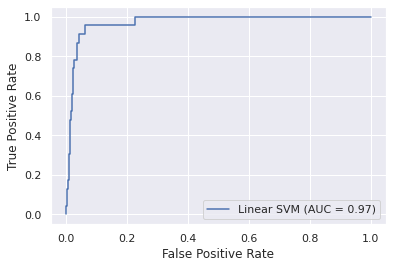

In [153]:
LinearSVMAUC = plot_roc_curve(SelectedLinearSVC, X_test_fin, y_test_fin, name = 'Linear SVM')
plt.show()   


In [154]:
LinearSVMAUC.roc_auc


0.9726398483001489

<AxesSubplot:>

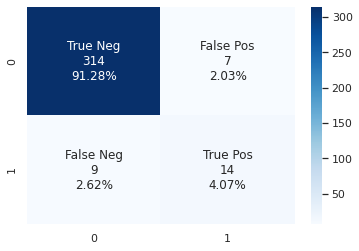

In [155]:
cf_matrix_lin = confusion_matrix(y_test_fin, SelectedLinearSVC.predict(X_test_fin))
plot_cf_matrix(cf_matrix_lin)

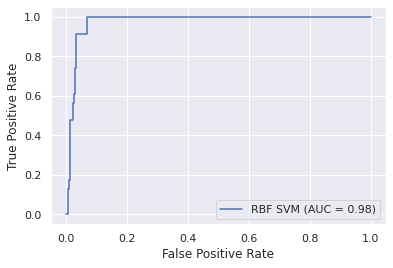

In [156]:
RbfSVMAUC = plot_roc_curve(SelectedRbfSVC, X_test_fin, y_test_fin, name = 'RBF SVM')
plt.show()   


In [157]:
RbfSVMAUC.roc_auc


0.976974129757551

<AxesSubplot:>

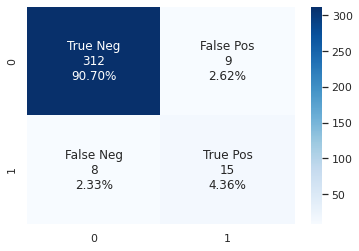

In [158]:
cf_matrix_rbf = confusion_matrix(y_test_fin, SelectedRbfSVC.predict(X_test_fin))
plot_cf_matrix(cf_matrix_rbf)

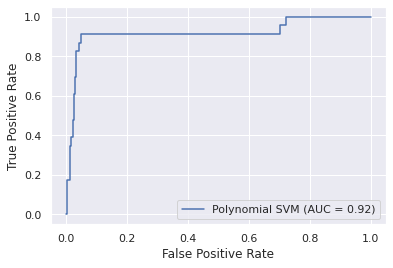

In [159]:
PolySVMAUC = plot_roc_curve(SelectedPolySVC, X_test_fin, y_test_fin, name = 'Polynomial SVM')
plt.show()   

In [160]:
PolySVMAUC.roc_auc

0.9192740078558851

<AxesSubplot:>

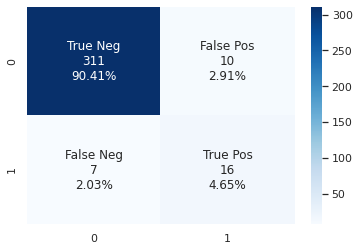

In [161]:
cf_matrix_ploy = confusion_matrix(y_test_fin, SelectedPolySVC.predict(X_test_fin))
plot_cf_matrix(cf_matrix_ploy)

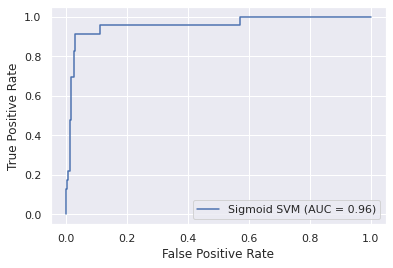

In [162]:
SigmoidSVMAUC = plot_roc_curve(SelectedSigmoidSVC, X_test_fin, y_test_fin, name = 'Sigmoid SVM')
plt.show()   

In [163]:
SigmoidSVMAUC.roc_auc

0.9576053094947853

<AxesSubplot:>

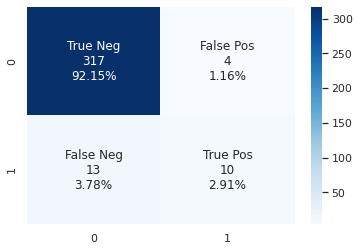

In [164]:
cf_matrix_sig = confusion_matrix(y_test_fin, SelectedSigmoidSVC.predict(X_test_fin))
plot_cf_matrix(cf_matrix_sig)

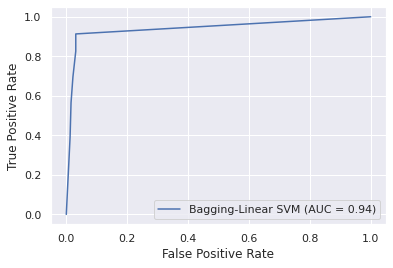

In [165]:
BaggingLinearSVMAUC = plot_roc_curve(SelectedBaggingLinearSVC, X_test_fin, y_test_fin, name = 'Bagging-Linear SVM')
plt.show()
   

In [166]:
BaggingLinearSVMAUC.roc_auc

0.9416903697683868

<AxesSubplot:>

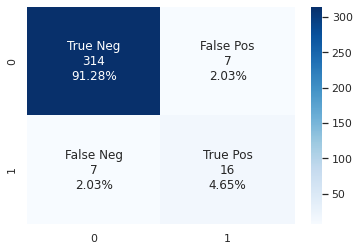

In [167]:
cf_matrix_bag = confusion_matrix(y_test_fin, SelectedBaggingLinearSVC.predict(X_test_fin))
plot_cf_matrix(cf_matrix_bag)

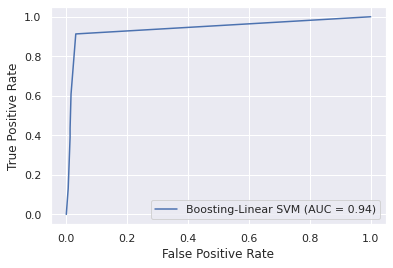

In [168]:
BoostingLinearSVMAUC = plot_roc_curve(SelectedBoostingLinearSVC, X_test_fin, y_test_fin, name = 'Boosting-Linear SVM')
plt.show()
   

In [169]:
BoostingLinearSVMAUC.roc_auc

0.9422321549505621

<AxesSubplot:>

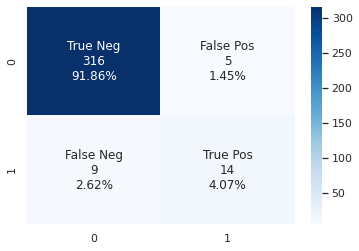

In [170]:
cf_matrix_boost = confusion_matrix(y_test_fin, SelectedBoostingLinearSVC.predict(X_test_fin))
plot_cf_matrix(cf_matrix_boost)

In [171]:

# # creating the model
# model = RandomForestClassifier()

# # feeding the training data into the model
# model.fit(x_train, y_train)

# # predicting the test set results
# y_pred = model.predict(x_test)

# # Calculating the accuracies
# print("Training accuracy :", model.score(x_train, y_train))
# print("Testing accuracy :", model.score(x_test, y_test))

# # classification report
# print(classification_report(y_test, y_pred))

# # confusion matrix 
# print(confusion_matrix(y_test, y_pred))

In [172]:
# Model	Accuracy	Precision	Recall	F1-Score	No. of Mislabeled Points
# 0	Linear(SVM)	0.976744	0.976744	0.976744	0.976744	2
# 1	RBF(SVM)	0.976744	0.976744	0.976744	0.976744	2
# 2	Polynomial(SVM)	0.976744	0.976744	0.976744	0.976744	2
# 3	Sigmoid(SVM)	0.976744	0.976744	0.976744	0.976744	2
# 4	Bagging-Linear(SVM)	0.976744	0.976744	0.976744	0.976744	2
# 

In [173]:
# Model	Accuracy	Precision	Recall	F1-Score	AUC	No. of Mislabeled Points
# 0	Linear(SVM) (w/ dropna)	0.968992	0.968992	0.968992	0.968992	0.500	4
# 1	RBF(SVM) (w/ dropna)	0.968992	0.968992	0.968992	0.968992	0.500	4
# 2	Polynomial(SVM) (w/ dropna)	0.945736	0.945736	0.945736	0.945736	0.488	7
# 3	Sigmoid(SVM) (w/ dropna)	0.937984	0.937984	0.937984	0.937984	0.605	8
# 4	Bagging(SVM) (w/ dropna)	0.968992	0.968992	0.968992	0.968992	0.500	4
# 
# 

In [174]:
# https://developers.google.com/machine-learning/crash-course/classification/true-false-positive-negative#:~:text=A%20true%20positive%20is%20an,incorrectly%20predicts%20the%20positive%20class.
# 
# You can divide the space into 2 parts: a triangle and a trapezium. 
# The triangle will have area TPR*FRP/2, the trapezium (1-FPR)*(1+TPR)/2 = 1/2 - FPR/2 + TPR/2 - TPR*FPR/2. 
# The total area is 1/2 - FPR/2 + TPR/2. 
# This is how you can get it, having just 2 points.
# 
# Blobstore

In [175]:
sns.set(style="darkgrid")

In [176]:
def average_auc(values: list):
    avg_auc = 0
    for value in values:
        avg_auc += value
    
    # 
    return avg_auc/len(values)

In [177]:
print(average_auc([0.50, 0.83, 0.9753]))

0.7684333333333333


In [178]:
def f1_score_custom(precision, recall):
    return 2*(precision * recall) / (precision + recall)

# print(f1_score_custom(0.6473, 0.6461))

In [179]:
# ['Model', 'Accuracy', 'F1-Score', 'Precision', 'Recall', 'AUC', 'FPR', 'TPR', 'TH', 'No. of Mislabeled Points']
# 
# ['Model', 'Accuracy', 'F1-Score', 'Precision', 'Recall', 'AUC']
performance_data_agg_copy = [
    ['Linear(SVM)', 0.6884, round(f1_score_custom(0.6573, 0.6861), 4), 0.6573, 0.6861, 0.6884],
    ['Polynomial(SVM)', 0.7187, round(f1_score_custom(0.7310, 0.7186), 4), 0.7310, 0.7187, 0.7637],
    ['RBF(SVM)', 0.8081, round(f1_score_custom(0.7905, 0.8081), 4), 0.7905, 0.8081, 0.8081],
    ['Sigmoid(SVM)', 0.7707, round(f1_score_custom(0.7610, 0.7707), 4), 0.7610, 0.7707, 0.8157],
    ['Bagging-Linear(SVM)', 0.6734, round(f1_score_custom(0.6194, 0.6534), 4), 0.6194, 0.6734,0.6784],
    ['Adaboost-Linear(SVM)', 0.8310, round(f1_score_custom(0.8278, 0.8310), 4), 0.8278, 0.8310,0.8519],  
]
#
# 

In [180]:
performance_data_agg_copy

[['Linear(SVM)', 0.6884, 0.6714, 0.6573, 0.6861, 0.6884],
 ['Polynomial(SVM)', 0.7187, 0.7247, 0.731, 0.7187, 0.7637],
 ['RBF(SVM)', 0.8081, 0.7992, 0.7905, 0.8081, 0.8081],
 ['Sigmoid(SVM)', 0.7707, 0.7658, 0.761, 0.7707, 0.8157],
 ['Bagging-Linear(SVM)', 0.6734, 0.6359, 0.6194, 0.6734, 0.6784],
 ['Adaboost-Linear(SVM)', 0.831, 0.8294, 0.8278, 0.831, 0.8519]]

In [181]:
# Performance Metric for each model
results_copy = pd.DataFrame(performance_data_agg_copy, columns=['Model', 'Accuracy', 'F1-Score', 'Precision', 'Recall', 'AUC'])
results_copy[['Model', 'Accuracy', 'Precision', 'Recall', 'F1-Score', 'AUC']]
# 
# 

,Model,Accuracy,Precision,Recall,F1-Score,AUC
0,Linear(SVM),0.6884,0.6573,0.6861,0.6714,0.6884
1,Polynomial(SVM),0.7187,0.7310,0.7187,0.7247,0.7637
2,RBF(SVM),0.8081,0.7905,0.8081,0.7992,0.8081
3,Sigmoid(SVM),0.7707,0.7610,0.7707,0.7658,0.8157
4,Bagging-Linear(SVM),0.6734,0.6194,0.6734,0.6359,0.6784
5,Adaboost-Linear(SVM),0.8310,0.8278,0.8310,0.8294,0.8519


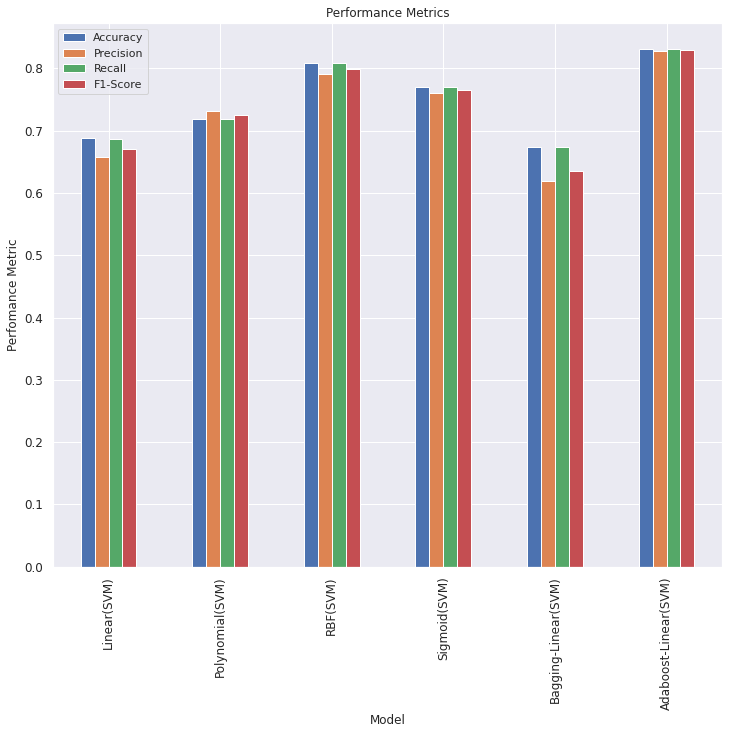

In [182]:

ax = results_copy[['Accuracy','Precision', 'Recall', 'F1-Score']].plot(kind='bar', title ="Performance Metrics", figsize=(12, 10), fontsize=12)
ax.set_xlabel("Model", fontsize=12)
ax.set_ylabel("Perfomance Metric", fontsize=12)
ax.set_xticklabels(list(results_copy['Model']))
plt.show()


In [183]:
# BaggingLinearSVMAUC = plot_roc_curve(SelectedBaggingLinearSVC, X_test_fin, y_test_fin, name = 'Bagging-Linear SVM')
# plt.show()

In [184]:
# # roc curve and auc
# from sklearn.datasets import make_classification
# from sklearn.linear_model import LogisticRegression
# from sklearn.model_selection import train_test_split
# from sklearn.metrics import roc_curve
# from sklearn.metrics import roc_auc_score
# from matplotlib import pyplot
# # generate 2 class dataset
# X, y = make_classification(n_samples=1000, n_classes=2, random_state=1)
# # split into train/test sets
# trainX, testX, trainy, testy = train_test_split(X, y, test_size=0.5, random_state=2)
# # generate a no skill prediction (majority class)
# ns_probs = [0 for _ in range(len(testy))]
# # fit a model
# model = LogisticRegression(solver='lbfgs')
# model.fit(trainX, trainy)
# # predict probabilities
# lr_probs = model.predict_proba(testX)
# # keep probabilities for the positive outcome only
# lr_probs = lr_probs[:, 1]
# # calculate scores
# ns_auc = roc_auc_score(testy, ns_probs)
# lr_auc = roc_auc_score(testy, lr_probs)
# # summarize scores
# print('No Skill: ROC AUC=%.3f' % (ns_auc))
# print('Logistic: ROC AUC=%.3f' % (lr_auc))
# # calculate roc curves
# ns_fpr, ns_tpr, _ = roc_curve(testy, ns_probs)
# lr_fpr, lr_tpr, _ = roc_curve(testy, lr_probs)
# # plot the roc curve for the model
# pyplot.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
# pyplot.plot(lr_fpr, lr_tpr, marker='.', label='Logistic')
# # axis labels
# pyplot.xlabel('False Positive Rate')
# pyplot.ylabel('True Positive Rate')
# # show the legend
# pyplot.legend()
# # show the plot
# pyplot.show()

In [185]:

# # dat=pd.DataFrame({'Models':models_used,'Metric':accuracy_ml,'Type':["Accuracy"]*5})
# sns.pointplot(x="Model", y="Accuracy", markers=["o"], data=results_copy)
# plt.title("Classification")
# plt.gcf().subplots_adjust(bottom=0.15)
# # plt.savefig("multi-mpl.png", format='png', dpi = 300, bbox_inches = "tight")
# # files.download("multi-mpl.png") 


In [186]:
# # who v/s fare barplot
# sns.barplot(x = 'Model',
#             y = 'Accuracy',
#             hue = 'Precision',
#             data = results_copy,
#             # estimator = np.median,
#             ci = 0)
# 
# # Show the plot
# plt.show()

In [187]:
# print(classification_report(y_test_fin, PredictedOutputBagSVC))


In [188]:
# 
# plt.plot(result['FPR'], result['TPR'], color = 'lightcoral',marker='o',label = 'AUC')
# 
# plt.xlabel("False Positive Rate")
# plt.ylabel("True Positive Rate")
# plt.title("AUC")
# 
# plt.legend()
# plt.grid()
# plt.tight_layout()
# 
# plt.show()
# y_pred_proba = clf.predict_proba(X_test)[::,1]
# fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
# 
# plt.plot(fpr,tpr,label="data 1, auc="+str(test_auc))
# plt.legend(loc=4)
# plt.show()
# 
# Reshape your data either using array.reshape(-1, 1) 
# if your data has a single feature or array.reshape(1, -1) if it contains a single sample.
# 
# fpr, tpr, thresholds = roc_curve(df_test_feature, NB_y_pred, pos_label=1)
# # roc_auc_score
# # 
# test_auc = auc(fpr, tpr)
# 
# 
# plot_roc_curve(clf, X_test, y_test) 
# label_0 = plot_roc_curve(NBClassifer, df_test_feature[:,0], test_label[:,0], name = 'label 0')
# plt.show()   
# 
# 
# 
# 
# Feature scaling
# scaler = MinMaxScaler().fit(X_train_fin)
# X_trainval_scaled_dna = scaler.transform(X_train_fin)
# X_test_scaled_dna = scaler.transform(X_test_fin)
# 
# Bagging_SVC = BaggingClassifier(base_estimator=SVC(),n_estimators=10, random_state=0, oob_score=False).fit(X_train_fin, y_train_fin)
# 
# # Bagging_SVC.predict(X_test_fin)
# y_pred_bag_svc = Bagging_SVC.predict(X_test_fin)
# # 
# # print(y_pred_bag_svc)
# print("Number of mislabeled points out of a total of %d points : %d" % (X_test_fin.shape[0], (y_test_fin != y_pred_bag_svc).sum()))
# # 
# 
# SVClassifer = MultiOutputClassifier(SVC(C = 2000, kernel = 'rbf'))
# SVClassifer.fit(df_train_feature, train_label)

# SVC_y_pred = SVClassifer.predict(df_test_feature)
# print("Testing accuracy :", SVClassifer.score(df_test_feature, test_label))

# accuracy_ml.append(SVClassifer.score(df_test_feature, test_label))
# print(classification_report(test_label, SVC_y_pred))
# 
# 

In [189]:
# # kernel{‘linear’, ‘poly’, ‘rbf’, ‘sigmoid’, ‘precomputed’}, default=’rbf’
# # 
# # svc = SVC(C=1.0, 
# #           kernel='rbf', degree=3, gamma='scale', coef0=0.0, 
# #           shrinking=True, probability=False, tol=0.001, 
# #           cache_size=200, class_weight=None, verbose=False, 
# #           max_iter=- 1, decision_function_shape='ovr', 
# #           break_ties=False, random_state=None)
# # 
# # 
# Linear_params = {'kernel':['linear']}

# for k in default_params:
#     Linear_params[k] = default_params[k]

# Linear_SVC = GridSearchCV(SVC(), default_params).fit(X_train_fin, y_train_fin)


In [190]:
# # 
# best_score=0
# kfolds=10 # set the number of folds
# # 
# # 0.001, 0.01, 0.1,
# for c in [0.1, 1, 10]:
#     rbfSVC = SVC(kernel='rbf', C=c)

#     # perform cross-validation
#     scores = cross_val_score(rbfSVC, X_train_fin, y_train_fin.flatten(), cv=kfolds, scoring='accuracy')
    
#     # compute mean cross-validation accuracy
#     score = np.mean(scores)
    
#     # Find the best parameters and score
#     if score > best_score:
#         best_score = score
#         best_parameters = c
# # 
# # rebuild a model on the combined training and validation set
# SelectedRbfSVC = SVC(kernel='rbf', C=c).fit(X_train_fin, y_train_fin.flatten())
# # 
# test_acc = SelectedRbfSVC.score(X_test_fin, y_test_fin)
# # test_acc = accuracy_score(y_test_fin, PredictedOutputRbfSVC)
# PredictedOutputRbfSVC = SelectedRbfSVC.predict(X_test_fin)
# # 
# fpr, tpr, thresholds = roc_curve(y_test_fin, PredictedOutputRbfSVC, pos_label=1)
# # roc_auc_score
# # 
# test_auc = auc(fpr, tpr)
# mislabeled_points = (y_test_fin.flatten() != PredictedOutputRbfSVC.flatten()).sum()
# # 
# # test_recall = recall_score(y_test_fin, PredictedOutputRbfSVC, pos_label=1)
# test_recall = {
#     'Micro':recall_score(y_test_fin, PredictedOutputRbfSVC, average='micro'), 
#     'Macro':recall_score(y_test_fin, PredictedOutputRbfSVC, average='macro'), 
#     'Weighted':recall_score(y_test_fin, PredictedOutputRbfSVC, average='weighted')
#     }
# # 
# test_precision = {
#     'Micro':precision_score(y_test_fin, PredictedOutputRbfSVC, average='micro'), 
#     'Macro':precision_score(y_test_fin, PredictedOutputRbfSVC, average='macro'), 
#     'Weighted':precision_score(y_test_fin, PredictedOutputRbfSVC, average='weighted')
#     }
# # 
# test_f1_score = {
#     'Micro':f1_score(y_test_fin, PredictedOutputRbfSVC, average='micro'), 
#     'Macro':f1_score(y_test_fin, PredictedOutputRbfSVC, average='macro'), 
#     'Weighted':f1_score(y_test_fin, PredictedOutputRbfSVC, average='weighted')
#     }
# #
# print("Best accuracy on validation set is:", best_score)
# print("Best parameter for regularization (C) is: ", best_parameters)
# print("Test Accuracy with best C parameter is", test_acc)   
# print("Test F1-Score with best C parameter is", test_f1_score)   
# print("Test Precision with best C parameter is", test_precision)   
# print("Test recall with the best C parameter is", test_recall)
# print("Test AUC with the best C parameter is", test_auc)
# print("Test ROC CURVE with the best C parameter is", [fpr, tpr])
# print("Number of mislabeled points out of a total of %d points : %d" % (X_test_fin.shape[0], mislabeled_points))
# # 
# m = 'RBF(SVM)'
# acc.append([m, test_acc, test_f1_score['Micro'], test_precision['Micro'], test_recall['Micro'], test_auc, fpr, tpr, thresholds, mislabeled_points])
# # 

In [191]:
# Model	Accuracy	Precision	Recall	F1-Score	AUC	No. of Mislabeled Points
# 0	Linear(SVM) (w/ dropna)	0.968992	0.968992	0.968992	0.968992	0.500	4
# 1	RBF(SVM) (w/ dropna)	0.968992	0.968992	0.968992	0.968992	0.500	4
# 2	Polynomial(SVM) (w/ dropna)	0.945736	0.945736	0.945736	0.945736	0.488	7
# 3	Sigmoid(SVM) (w/ dropna)	0.937984	0.937984	0.937984	0.937984	0.605	8
# 4	Bagging(SVM) (w/ dropna)	0.968992	0.968992	0.968992	0.968992	0.500	4

In [192]:
# import pandas as pd
# import matplotlib.pyplot as plt

# # Bring some raw data.
# frequencies = [6, 16, 75, 160, 244, 260, 145, 73, 16, 4, 1]
# # In my original code I create a series and run on that,
# # so for consistency I create a series from the list.
# freq_series = pd.Series(frequencies)
# 
# x_labels = [
#     108300.0,
#     110540.0,
#     112780.0,
#     115020.0,
#     117260.0,
#     119500.0,
#     121740.0,
#     123980.0,
#     126220.0,
#     128460.0,
#     130700.0,
# ]
# 
# # Plot the figure.
# plt.figure(figsize=(12, 8))
# ax = freq_series.plot(kind="bar")
# ax.set_title("Amount Frequency")
# ax.set_xlabel("Amount ($)")
# ax.set_ylabel("Frequency")
# ax.set_xticklabels(x_labels)
# 
# rects = ax.patches
# 
# # Make some labels.
# labels = [f"label{i}" for i in range(len(rects))]
# 
# for rect, label in zip(rects, labels):
#     height = rect.get_height()
#     ax.text(
#         rect.get_x() + rect.get_width() / 2, height + 5, label, ha="center", va="bottom"
#     )
# 
# plt.show()
# 
# https://www.section.io/engineering-education/multi-label-classification-with-scikit-multilearn/
# 
# 

In [193]:

# true positives (TP): These are cases in which we predicted yes (they have the disease), and they do have the disease. 
# true negatives (TN): We predicted no, and they don't have the disease. 
# false positives (FP): We predicted yes, but they don't actually have the disease.
